# Models-Based Collaborative Filtering

## Introduction

p.93
이전 chapter의 이웃 기반 방법은 ML의 일반적으로 사용되는 K-nearest neighbor classifiers의 일반화입니다. 이런 방법은 인스턴스 기반 방법으로, 효율적인 구현 하기위한 단계가 이웃 찾기 밖에 없습니다. 

모델 기반 방법에서는 지도/비지도 ML과 마찬가지로 데이터의 요약 된 모델이 미리 생성됩니다. 즉, 훈련(or 모델 구축 단계)은 예측 단계와 명확히 구분 됩니다. 차이점은 아래 그림을 보면 이해가 빠릅니다. 

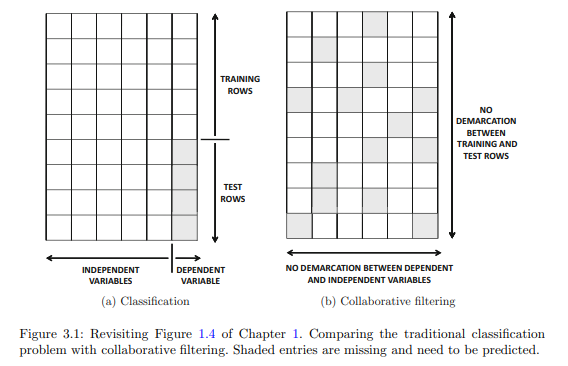

1. ML에서는 feature와 target의 구분이 명확하지만 등급 행렬에서는 구분이 없습니다.
2. train/test 구분이 명확하지 않습니다. 
3. feature와 instance의 구분이 명확하지 않습니다. ML에서는 행이 instance지만 CF에서는 열도 instance입니다.

CF 알고리즘 설계할때 CF와 cls의 유사성을 염두에 두는것은 유용합니다. 이는 cls가 잘 연구된 분야이고, cls가 CF 모델링에 중요한 힌트를 제공하기 때문입니다. 다시말해서 모델을 cls와 비슷하게 설계하면 잘 발전한 알고리즘을 적용할 수 있습니다. 하지만 cls를 행렬 완성 문제로 일반화 하는것은 쉬운문제가 아닙니다. 특히 missing value에서는 더 어렵습니다. 
모델 기반의 장점은 다음과 같습니다.
1. Space-efficiency: 모델을 학습하는것이 매우큰 R을 계산하는것 보다 효율적입니다.
2. Training speed and prediction speed: 1번과 마찬가지로 효율적인 만큼 속도도 빠릅니다.
3. Avoiding overfitting: 모델 기반은 오버피팅을 방지하는 method가 잘 연구 되어 있습니다.

이웃 기반은 가장 초기CF모델이므로 단순하지만 정확도는 model-based 방식에 비해 떨어집니다. 이 장 에서는 모델 기반에 대하여 설명 합니다.

## Decision and Regression Trees

tree 기반은 분류에서 잘 사용 됩니다. Decirion은 범주형, Regression은 연속형 target에서 사용됩니다. tree은 각 클래스를 분할 해가면서 정보량을 계산해 최적화 하는 방식입니다. 책 에서는 개요수준으로 적혀있으니 직접 찾아보는것이 정확합니다.

### Extending Decision Trees to Collaborative Filtering

Decision Tree를 CF로 확장하기 위해서 다음과 같은 주요 과제가 있습니다.
1. target의 명확한 분리(종속, 독립 변수의 명확한 분리)
2. 희소행렬 processing

각 방법들의 해결책은 다음과 같습니다.   
1번은 각 item의 등급을 예측하기 위해 별도의 Decision Tree를 구성하여 비교적 쉽게 해결 할수 있습니다. 각 item을 종속 변수로 고정하고 나머지 속성을 독립적인 feature로 보는것입니다. 즉 item별로 Decision Tree model을 구상하여야 합니다. 

2번은 비교적 어려운 문제 입니다. 특정 item $i$가 분할 속성으로 사용된다고 가정하였을때, $r_i$가 없는 instance의 처리를 어떻게 해야할지 곤란한 경우가 생깁니다. 간단하게 모든 자식 노드로 전부 상속한다고 했을때 분할 속성으로서의 의미가 사라지고 충돌 가능성이 높아 집니다. 더 합리적인 방식으로 이전장에서 소개한 차원 축소를 생각해볼 수 있습니다. 하지만 n개의 모델을 설계하기 위하여 n번의 차원축소를 시행 하는 것은 매우 비효율 적입니다. 

## Rule-Based Collaborative Filtering

연관규칙은 슈퍼마켓 데이터에서 제안되었습니다.(implicit data) 설명하기에 앞서 notation을 먼저 정의 합니다. 거래 데이터(transaction database) $\tau = {T_1, \dots, T_m}$란 n개의 item set I 에서 정의된 m개의 거래 데이터 집합들의 집합입니다. 즉 $T_i \subset I$ 입니다.   
association rule mining의 핵심은 트랜잭션 데이터베이스에서 밀접하게 관련된 항목 집합을 결정하는 것입니다. 이것은 **Support**과 **Confidence**의 개념으로 달성됩니다. 이러한 측정은 항목 집합 간의 관계를 정량화합니다.

**Definition 3.3.1 (Support)**The support of an itemset X ⊆ I is the fraction of transactions in T , of which X is a subset.

item set의 support가 threshold 이상이면 item sets이 **frequent itemsets** 또는 **frequent patterns**이라고 합니다. 여기서 threshold는 **minimum support** 이라고 합니다. 빈번한 item sets는 고객 구매 행동의 상관관계에 대하여 매우 중요합니다.

예시로 보겠습니다. 다음은 거래 데이터로 각 row가 transation입니다. 

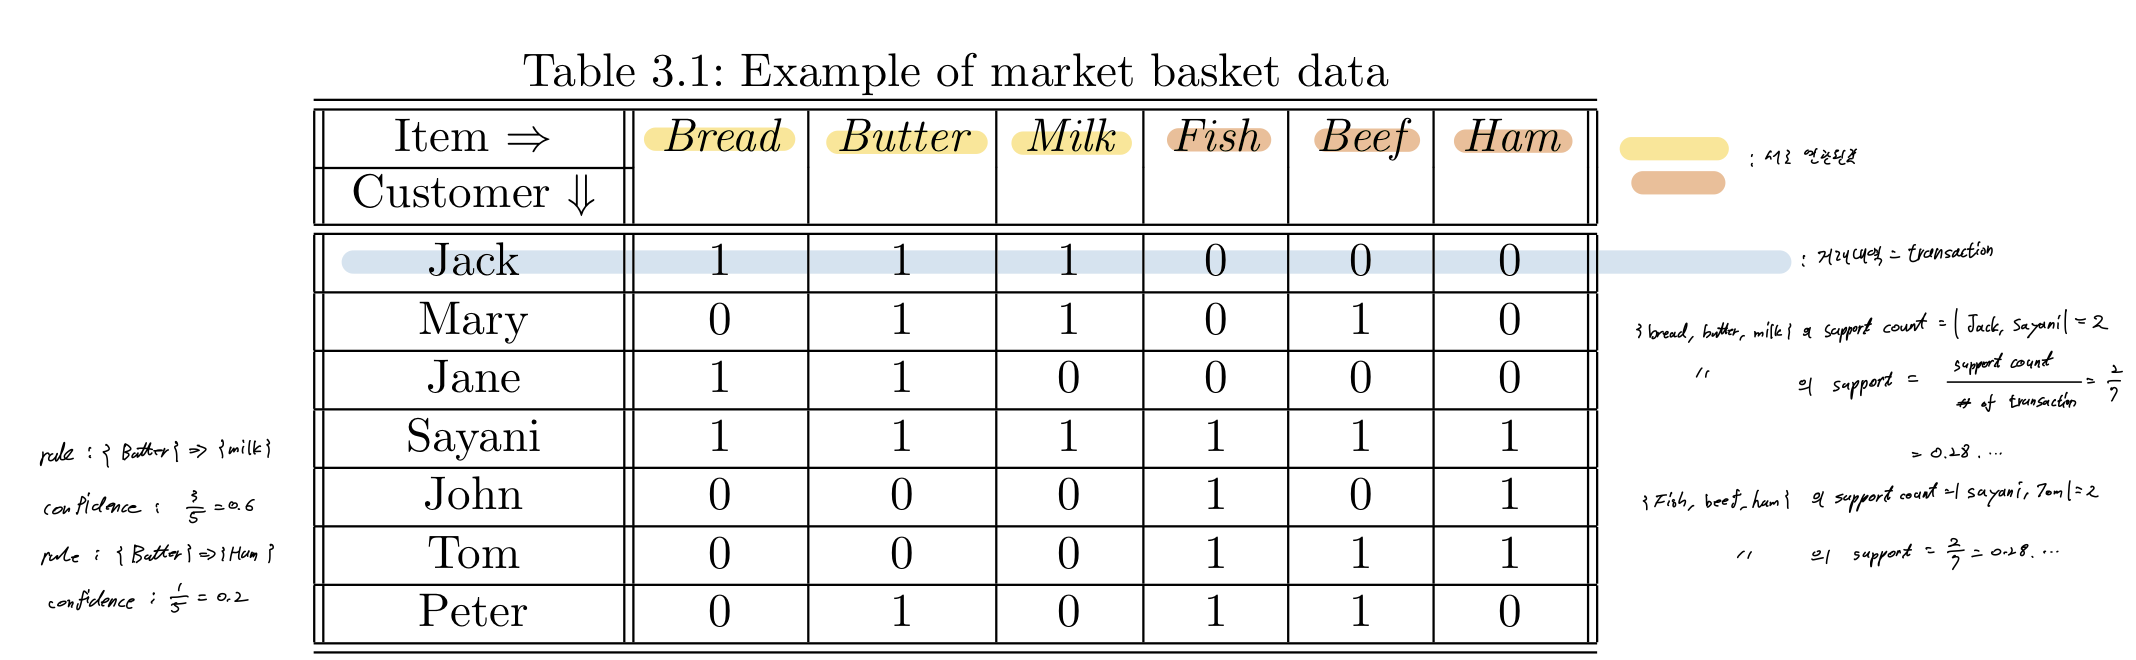

{Bread, Butter, Milk}와 {Fish, Beef, Ham}에 대하여 support count는 각각 |Jack, Sayani|, |Sayani, Tom|으로 2입니다.
support는 transactions의 비율인 $\frac{2}{7}$입니다. minimum support(threshold)를 0.2로 설정한다면 {Bread, Butter, Milk}와 {Fish, Beef, Ham}는 빈번한 항목입니다. 이렇게 support가 높은 집합을 찾는것은 마케팅에서 매우 중요합니다. 위 예시에서 Mary사 {butter, Milk}를 구매했기 때문에 bread를 구매 할 것이라고 예측 할 수 있습니다.

**Association Rules**은 $X \Rightarrow Y$ 로 표현되고 규칙의 강도는 **Confidence**라고 합니다.

**Definition 3.3.2 (Confidence)** The confidence of the rule  $X \Rightarrow Y$ is the conditional probability that a transaction in T contains Y , given that it also contains X. Therefore, the confidence is obtained by dividing the support of X ∪ Y with the support of X.

정의를 해석하자면 $X \Rightarrow Y$의 Confidence는 X를 포함한 transactions중 Y를 포함한 transactions의 비율입니다. 위의 예시로 Confidence를 계산해 보겠습니다. 규칙 {butter} $\Rightarrow$ {milk} 와 {butter} $\Rightarrow$ {Ham} 이 있을때 각각 confidence는 $\frac{|Jack, Mary, Sayani|}{|Jack, Mary, Jane, Sayani, Peter|}=\frac{3}{5}=0.6$, $\frac{1}{5}=0.2$ 입니다. 즉,버터를 구매하면 햄을 구매한다는 규칙보다 우유를 구매한다는 규칙의 신뢰도가 더 높습니다.

예시를 들때 임의로 규칙을 선정했는데 연관 규칙도 정의가 있습니다.

**Definition 3.3.3 (Association Rules)** A rule X ⇒ Y is said to be an association rule at a minimum support of s and minimum confidence of c, if the following two conditions are satisfied:
1. The support of X ∪ Y is at least s.
2. The confidence of X ⇒ Y is at least c.

규칙 $X \Rightarrow Y$은 1, 2번을 만족하면 s의 minimun support & c의 minimun confidence에서 연관규칙이라고 한다.   
예시를 이어가 보겠습니다. 규칙 {butter, milk} $\Rightarrow$ {ham}은 $s(\{butter, milk, ham\}) = \frac{1}{7}$이고,  $c(X \Rightarrow Y) = c(\{butter, milk\} \Rightarrow \{ham\}) = \frac{1}{3}$이므로  minimun support $\frac{1}{7}$,  minimun confidence $\frac{1}{3}$에서 연관규칙이라고 합니다.

연관 규칙을 찾는 process는 2 단계로 구성됩니다.
1. support의 threshold이상인 itemsets 찾기
  + $\forall Z$ transactions에 대하여 $X\subsetneq Z$를 만족할때 가능한 규칙은 $X \Rightarrow Z-X$입니다.
  + $s(Z) = s(X \Rightarrow Z-X)$ 즉, $Z$하나의 support만 먼저 계산해서 threshold를 넘기지 않으면 치워 버립니다.
2. 통과한 Z들 중 $c(X \Rightarrow Z-X)$ 를 계산합니다.

### Leveraging Association Rules for Collaborative Filtering

연관 규칙은 단항 등급(구매정보, facebook좋아요 등등)에서 특히 더 유용합니다. 드디어 규칙기반 CF가 나옵니다. 규칙기반 CF의 단계는 다음과 같습니다.

1. 규칙검색(s, c의 임계값을 만족하는 것들)
2. 검색된 규칙($X \Rightarrow Y$)에서 $|Y|=1$인것만 유지합니다.

이 두단계만 거쳐도 특정 사용자에게 추천이 가능합니다. 각 도메인에서 위의 단계의 여러가지 변형규칙이 존재합니다. 예를들어 신뢰도 순으로 정렬을 하면 ranking task입니다.

##  Naive Bayes Collaborative Filtering

이 장에서는 등급의 서순이 없다고 가정합니다. 즉 categorical value로 바라봅니다.
나이브 베이즈 모델은 분류에 사용되는 생성 모델로 빈칸 체우기에 좋습니다. 통계에 대한 배경지식이 조금 있어야 하지만 조건부확률 정도만 알아도 되기 때문에 그렇게 어렵지 않습니다. 바로 식을 보면서 이해해보겠습니다.

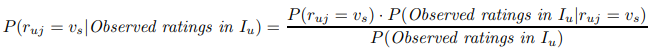

베이즈 규칙에 의해서 $r_{uj}$가 등급 $v_s$일 확률은 위와 같이 표현 됩니다. 여기서 분모부분은 상수니깐 비례식으로 아래와 같이 표현이 가능합니다.



또한 식의 가장 오른쪽 조건부 확률 부분은 naive assumption에 따라 다음과 같이 표현 됩니다.

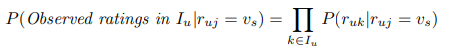

즉 아래와 같은 비례식이 정의 되는데 사용자 u의 등급 $r_{uj} = v_s$일 확률은 사용자가 매긴 등급들의 조건부 확률값의 곱과 비례합니다.

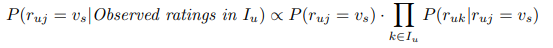

여기서 $\hat{r_{uj}}$은 확률을 가장 높게 하는 $v_s$이므로 다음과 같이 계산됩니다.

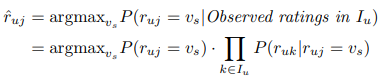

좀더 자세한 계산식은 전확률의 법칙을 적용시킨 아래와 같은데 길고 복잡해 보이지만 별거 아닙니다. 이따가 예시를 보면 바로 이해 됩니다!

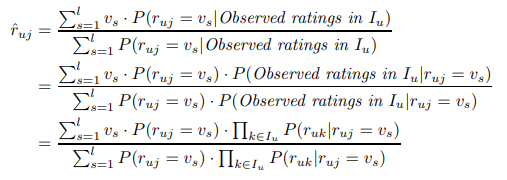

### Handling Overfitting

데이터 기반 추정 방식인 나이브 베이즈 방식은 데이터가 희소할수록 Robust하지 않습니다. 예를들어 item j를 평가한 사람이 별로 없는 경우 확률값 $P(r_{uj}=v_s)$의 신뢰도가 떨어집니다. 게다가 계산시에도 $\frac{0}{0}$꼴이 나오기 때문에 더욱 조심해야 합니다.

이를 위해 라플라시안 스무딩을 사용합니다. 

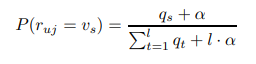

### Example of the Bayes Method with Binary Ratings

앞서 예시를 들면 이해가 쉽다고 했습니다. 바로 계산해 봅시다!

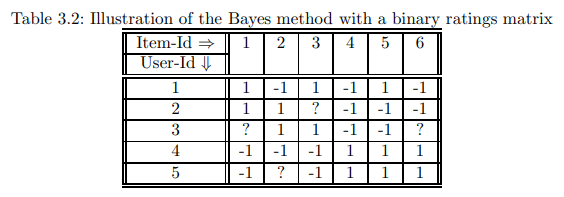

데이터가 이진 등급이므로 $r_{3,1} = 1$인 확률과 $r_{3,1} = -1$일 확률을 계산해 보겠습니다.

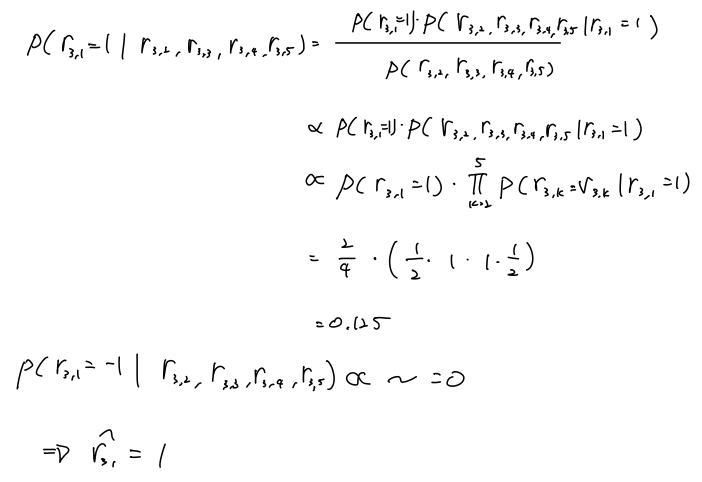

다음과 같이 $\hat{r_{3,1}} = 1$입니다.

## Using an Arbitrary Classification Model as a Black-Box

항상 그렇듯이 cls, reg를 CF의 경우로 확장이 가능합니다. 주요 과제는 누락데이터, 희소문제 입니다. 이는 NLP(텍스트 마이닝)에서와 비슷합니다. 그래서 앞에서 long tail의 악영향을 줄이기 위하여 IDF의 원리를 적용해보는 시도도 있었습니다. 이번에는 Classification Model(ex. SVM, NN...)을 적용하기 위해서 주요 희소 문제를 해결하려는 시도를 보겠습니다. 앞의 2.5절에서 설명했던 문제(~누락값을 더 잘 예측하기 위하여 누락값을 먼저 계산해야하는 이상한 상황에 놓이게 됩니다~)와 비슷합니다. 

이번에 설명하는 누락값을 체우는 방법입니다.
1. 초기에 누락값을 0으로 init합니다.
2. 알고리즘으로 누락값 하나를 예측합니다.
3. 예측된 값을 포함한 행렬로 다시 다른 누락값을 예측합니다.
4. 2번과 3번을 반복 합니다.

### Example: Using a Neural Network as a Black-Box

위에서 설명한 방식을 Neural Network로 예시를 들어 봅니다. Neural Network에 대한 간단한 설명이 이어지지만 기본적인거라 바로 그림으로 보고 넘어 가겠습니다. 

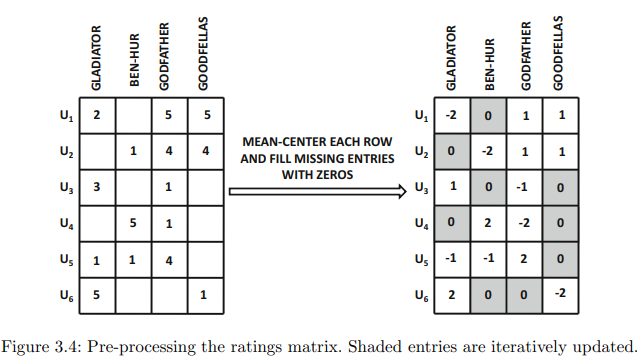

먼저 편향을 고려하여 평균-중심화 된 행렬에서 누락값을 0으로 초기화 시킵니다. 그런 다음 아래 그림과 같은 과정을 반복합니다.

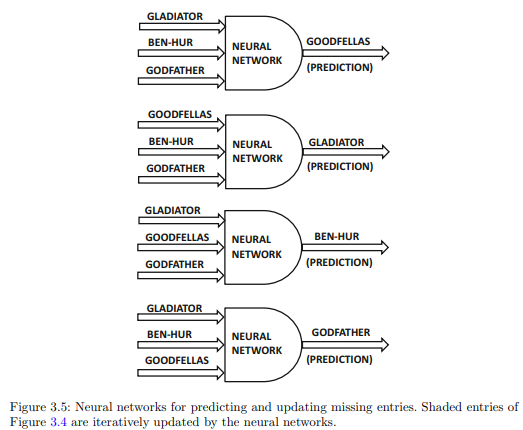

## Latent Factor Models

2장에서 잠깐 설명했던 방식으로 보다 정교한 설명을 해줍니다. 기본 아이디어는 R의 행과 열의 상단부분이 높은 상관 관계를 가지고 있으므로 데이터는 중복성이 내장되어 있습니다. 그러니깐 Low-Rank Matrix로 근사가 가능하다는것 입니다.(여기서 Rank는 순서가 아닌 행렬의 rank을 말하는 것 입니다.) 특히 Latent Factor Model은 추천에서 성능이 매우 좋습니다.

###  Geometric Intuition for Latent Factor Models

Latent Factor Model의 기하학적 직관을 low-rank, re-dundancy, correlation와 연관지어 설명해주고 있습니다. 설명이 길어서 그림과 예시로 정리해 보겠습니다. 먼저 Nero, Gladiator, Spartacus 3개의 영화가 있는 이진등급 행렬을 가정해보겠습니다. 3개의 등급이 양의 상관관계가 있을경우 등급의 3차원 산점도는 아래의 그래프와 같습니다. 여기서 각 노이즈를 제거하면 데이터가 1차원 선으로 근사됩니다. 즉, low-Rank가 1이 됩니다.

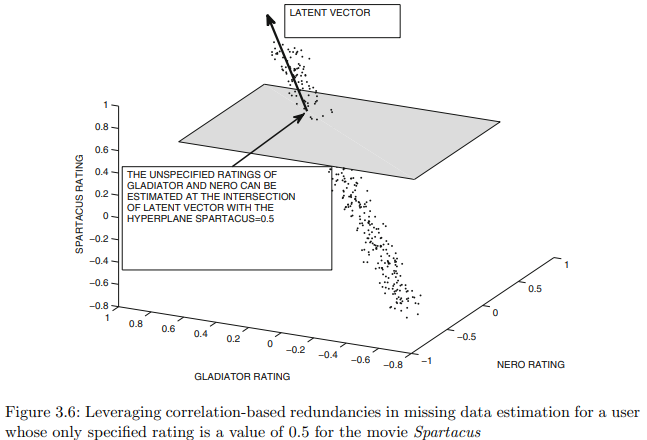

차원축소는 이러한 성질을 이용하여 row을 p차원($p << min(m, n)$) 벡터로 표현합니다. 위의 예시에서 말하자면 한개를 고정하면 나머지 두개가 결정되는 성질을 이용합니다. 즉, SVD와 같은 차원축소 방법은 unseen rating을 추론하기 위해 속성한 상관관계및 중복성을 활용합니다.

사실 위의 예시는 Latent Vector를 추정하기 위해 등급 행렬을 사용할 수 있다고 가정한 경우 입니다. 실제로는 완전한 R이 존재 하지 않습니다. 누락값이 있는 R을 Latent Vector로 추정하는 능력이 이 핵심 성공요인입니다.

기본 아이디어는 Latent Vector에서 MSD(평균 제곱 거리)를 찾기 가능한 공간을 구축하는 것입니다. 따라서 데이터가 놓여있는 저차원을 복구하기 위해서 부분적으로 지정된(seen) 데이터를 사용해야 합니다. 이렇게 하면 데이터의 상관 관계 구조에서 기본 중복성을 암시적으로 캡쳐하고 모든 누락값을 한번에 재구성 가능 합니다. 
모든 누락된 item i 를 예측하는데 도움이 되는 것은 암시적 중복에 대한 지식입니다. 즉, 데이터 상관관계가 중복성이 없으면 latent Factor model은 작동하지 않습니ㅏㄷ.

### Low-Rank Intuition for Latent Factor Models

행렬 분해가 수행하는 역할을 조사 합니다. 먼저 간단하게 모든 등급이 있는 R을 고려해봅니다. 핵심 아이디어는 R의 rank : $k<<min(m,n)$ 는 항상 rank-k factors의 곱으로 표현될 수 있다는 것 입니다.

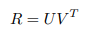

여기서 $U$는 m by k, $V$는 n by k입니다. 이러한 MF방법은 무수히 많습니다. 계속 예시를 들어왔던 SVD는 U(or V)의 각 벡터가 직교하는 제약조건이 있는 특수한 경우 입니다.

심지어 R의 rank가 k보다 큰 경우에도 다음과 같이 근사치로 표현될 수 있습니다.



### Basic Matrix Factorization Principles

기본적인 MF(Matrix Factorization) model은 다음과 같이 m x n 등급 행렬 R을 m x k 행렬 U와 n x k 행렬 V로 분해 하는것 입니다.

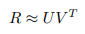

분해된 행렬의 각 columns는 latent vector or latnet component라고 합니다. row는 latent factor라고 합니다. U의 i 번째 row $\bar{U_i}$는 user factor 라고 하며 등급 행렬에 대한 사용자 i의 선호도에 해당하는 k 개의 항목을 포함합니다. 아래의 그림을 보면 좀더 직관적으로 이해 할 수 있습니다.

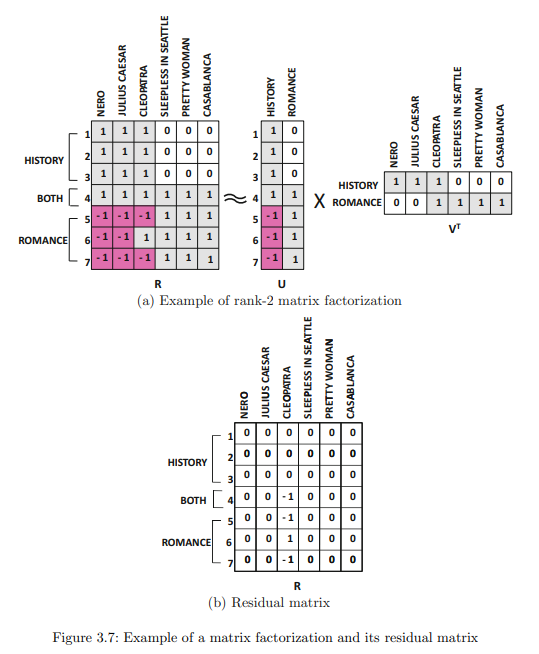

위의 그림을 식으로 써보자면 다음과 같습니다.

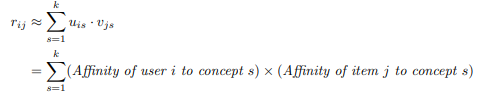

###  Unconstrained Matrix Factorization

MF의 가장 기본 형태는 제약조건이 없는 U, V로 분해하는것 입니다. 어떻게 분해하는지는 다음식을 만족하도록 반복해서 훈련하면 됩니다. 훈련은 GD, ALS(일반적으로 이 방식이 성능이 더 좋다고 합니다)으로 진행됩니다. 정규화 항도 넣을수 있습니다.

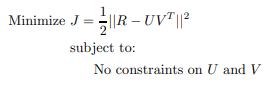

하지만 결국 missing value가 있기 때문에 J를 계산 할 수 없습니다. 따라서 누락값을 뺴고 J를 계산합니다. 이 방법의 장점은 역시 효율성입니다. U, V를 계산하면 R을 한번에 계산 할 수있기 때문입니다.

####  Stochastic Gradient Descent

일반적인 SGD설명입니다.

#### Regularization

앞서 설명한 정규화항을 추가 하는 방법과 동일합니다

#### Incremental Latent Component Training

앞서 설명했던 대로 사람마다 등급을 매기는 편향이 다릅니다. 따라서 이전과 같은 방식인 평균 중심에서 예측을 시행한 후 다시 평균을 더해주는 작업을 기본으로 가정하고 들어갑니다.

각 사용자 i와 관련하여 사용자가 항목을 평가하는 일반적인 편향을 나타내는 변수 $o_i$가 있습니다. 예를 들어 사용자 i 가 모든 항목을 높게 평가하는 사람이라면 변수 $o_i$는 양수입니다. 마찬가지로 변수 $p_j$는 항목 j의 등급 편향을 나타냅니다. 그러므로 예측값은 다음과 같이 표현됩니다.

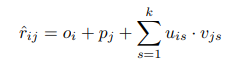

예측값 공식이 변경됨에 따라 잔차와 목적함수(정규화 항을 포함함) 또한 다음과 같이 수정됩니다.

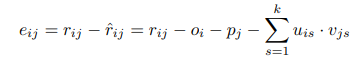

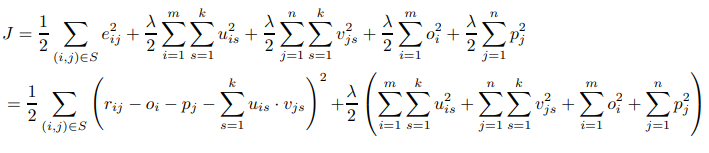

이러한 방식은 계산을 복잡하게 하므로 편향을 행렬에 추가해서 아래와 같이 간단하게 만들수 있습니다.

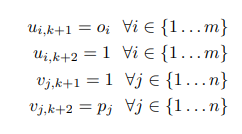

이에 따라 목적함수도 간단해 집니다. 

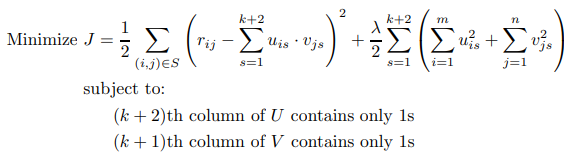

식만 으로는 직관적인 이해가 어려우나 그림을 보면 바로 이해가 됩니다.

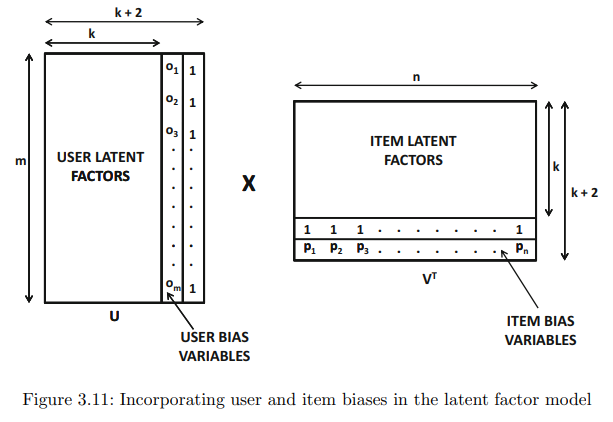

####  Alternating Least Squares and Coordinate Descent

#### Incorporating User and Item Biases

#### Incorporating Implicit Feedback

implicit feedback은 일반적으로 구매, 클릭과 같은 데이터이지만 explicit으로도 implicit feedback을 캡쳐할수 있습니다. 이 아이디어는 다음과 같은 관점에서 나왔습니다. 

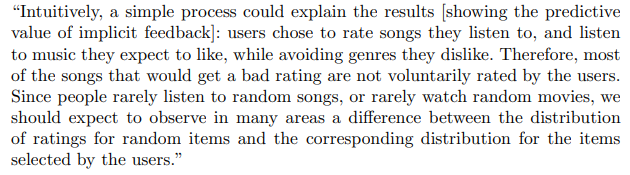

쉽게 말해서 explicit feedback은 implicit feedback이 선행되어야 나옵니다.

이러한 implicit feedback을 통합하기 위해서 *asymmetric factor models* 과 *SVD++* 모델이 제안되었습니다. 이런 알고리즘은 각각 explicit, implicit 에 해당하는 두개의 서로다를 item 계수 행렬 $V$, $Y$를 사용합니다. 

먼저 *asymmetric factor models*는 사용자 잠재 인자는 Y의 행 선형 조합을 사용해서 도출합니다. 이 방식의 기본 아이디어는 사용자 선호도는 평가한 항목의 영향을 받아야 한다.(왜냐하면 선호하는 것을 선택하고 평가 하기 때문입니다.)

한가지 특이한점은 Y의 선형 조합으로 사용자 요인을 만들기 때문에 사용자에 대한 독립변수가 없습니다.

여기서 SVD++는 (명시적)사용자 요소와 기존 인수분해 프레임워크를 결합하였습니다. 즉, 비대칭 접근법은 SVD++의 단순한 선구자로 볼 수 있습니다.

**Asymmetric Factor Model**  
비대칭 모델에 대하여 좀더 자세하게 설명하자면, implicit feedback 정보를 캡쳐하기 위해 explisit R에서 implicit F을 도출해 냅니다. 다음은 explisit R에서 implicit F을 도출 하는 과정입니다.

1. implicit $[F]$는 explisit R에서 누락값은 0, 존재하는 값은 1로 처리합니다.
2. 각 행을 정규화 합니다.
3. 각 행을 정규 벡터화 합니다.

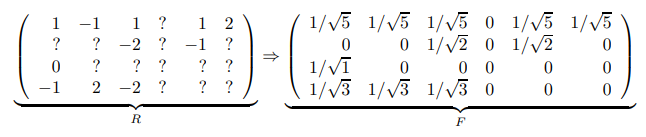

F를 구한 다음 implicit item-factor matrix인 n x k 행렬 Y를 설명합니다. 
Y는 implicit feedback에 기여한느 각 factor-item 조합의 성향을 인코딩 합니다. 예를들어 $|y_{ij}|$가 크다는 것은, i에 등급을 매기는 행위가 등급의 실제 값이 무었이든 상관없이, j번째 잠재 구성 요소에 대하여 해당 행위의 친화성에 대한 중요한 정보를 포함 한다는 것을 의미 합니다. 쓰고 나니 무슨말인지 이해가 더 안되는데 간단하게 i와 j가 연관되어 있구나~로 이해하면 편합니다!

단순화된 비대칭 모델에서 사용자 요소는 평가된(관찰된) 항목의 implicit item factor의 선형조합으로 인코딩 됩니다. 기본 아이디어는 사용자가 등급을 매기는 행위의 선형 조합을 사용하여 선호도(요인)를 정의한다는 것 입니다. 

정리 하자면 F는 사용자가 등급을 매겼다는 것 자체만으로도 implicit feedback이 있으므로 F는 등급을 매기는 행위를 의미하고 Y는 각 implicit feedback이 얼마나 영향력이 있는지를 의미합니다. 즉 $F\cdot Y$는 m x k인 사용자 요인 행렬($U$)이 됩니다.

다시 말해서 **$R \approx [F\cdot Y]V^T$** 로 분해 됩니ㅏㄷ. n x k 행렬$V$는 explicit factor Matrix입니다. 연습문제 13을 보라고 하는데 밑에서 한번 풀어보겠습니다. 

추가로 3.6.4.3장에서 논의된 대로 평균 중심을 맞추고 각 행렬에 두개의 열을 추가해 편향 모델링도 가능합니다.

위의 방법은 항목 요소의 선형 조합으로 사용자 factor를 유도하여 중복도를 줄이므로 우수한 성능을 발휘합니다. 이는 두명의 사용자가 등급값에 관계없이 유사한 항목을 평가하면 유사한 사용자 요소를 가지게 된다는 기본아이디어에서 비롯됩니다.

비대칭 모델의 장점은
1. Y는 U보다 부피가 작습니다.(n << m)
2. 사용자 매개변수화가 필요없습니다. 이는 표본외 아이템에서는 성능이 감소하고 표본외 사용자에서는 성능이 향상됩니다.
3. 대부분의 MF에서 우수한 성능을 보여 줍니다. 
4. item-based 매개변수화는 설명 가능성도 있습니다.

4번을 간단히 설명하자면 $[FY]V^T = F[YV^T]$로 본다면 $Y$는 기여도를 인코딩 하기 때문에 항목 i의 등급을 매기는 행위가 항목 j의 예측된 평아게 얼마나 기여하는지 알 수 있습니다. 즉, $F$와 $[YV^T]$의 곱은 사용자 대 항목 예측으로 해석됩니다. 따라서 사용자가 이전에 소비/평가한 항목이 $F[YV^T]$의 예측에 가장 많이 기여하는 항목을 설명 할 수 있습니다.

**SVD++**  
비대칭 모델의 단점은 비슷한 항목을 평가 했지만 등급이 매우 다른 경우를 구분하지 못합니다. SVD++는 이러한 단점을 보완하기 위해서 $FY$를 $U$로 보는것이 아니라 조정하는데 사용됩니다. 따라서 $V^T$와 연산하기 전에 $(FY+U)$를 해줍니다. 따라서 SVD++의 기본 구조는 **$R \approx [FY + U]V^T$** 로 표현됩니다. 

~이름은 SVD++지만 SVD가 절대 아닙니다. 통상적으로 MF를 SVD라고 표현해서 이렇게 이름이 붙여졌답니다.~

이 접근법의 장점은 유연성에 있습니다. 비슷한 항목을 평가 했지만 등급이 매우 다른 경우를 구분 할 수 있습니다. 단점으로는 데이터가 희소하면 희소할수록 오버피팅의 가능성이 높아 진다는 것 입니다. 

### Singular Value Decomposition

드디어 SVD에 대한 설명이 나옵니다. 먼저 장점은 상호 직교이기 때문에 산점도에서 기하학적 해석이 가능합니다. 또한 완전한 R에서 성능이 매우 좋습니다. 하지만 의미론적 해석이 어렵다는 단점이 있습니다. MF에 적용은 형대수학의 기본지식이 있다면 아래 수식 하나만 봐도 이해가 다 됩니다.
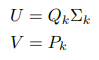

#### A Simple Iterative Approach to SVD

SVD는 간단한 대신 누락값을 채워야 하는 전처리 과정을 거쳐야 합니다. 앞서 EM방식을 설명했으므로 이번에는 3.5.장에서 했던 방식과 유사한 방식을 설명합니다. 
1. 먼저 평균-중심화 합니다.
2. 누락값을 0으로 처리합니다.
3. truncatedSVD을 시행합니다.
4. 3번에서 구해진 값으로 누락값을 채웁니다.
5. 3번과 4번을 반복합니다.
6. 1번에서 계산한 편향인 평균을 더합니다.

이러한 방식은 누락된 값이 많으면 많을수록 local minimun에 수렴할 가능성이 높습니다. 따라서 SVD로 예측을 시행하는것이 아니라 등급행렬 R의 누락값을 초기화 하는데 효과적이라고 합니다.

#### An Optimization-Based Approach

아무리 MF가 효율적이라도 반복적인 방식은 비용이 많이 듭니다. 작은 행렬에서 연산을 수행하는 것은 간단하지만 큰 데이터에서는 효율적인 방법이 필요합니다. GD방식 훈련과정에 직교성 제약조건을 추가하면 효율적이라는데 자세한 원리가 설명되어 있지 않습니다.  
SVD의 기하학적 성질을 유지하는걸로 이해 했습니다.

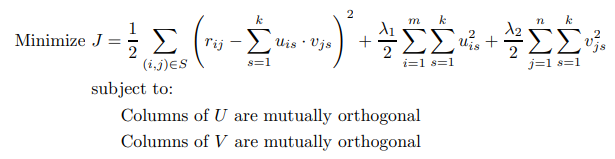

####  Out-of-Sample Recommendations

MF방식은 효율적인 반면 새로운 사용자, 항목에 취약합니다. 하지만 SVD와 같이 orthogonal basis vectors는 새로운 사용자에 대한 활용이 가능합니다. 새로운 사용자에 대한 시나리오를 생각해보겠습니다.
1. h개의 항목을 평가한 새로운 사용자 등장
2. 총 n개의 항목이 있다면 (n-h)차원 하이퍼플레인이 이 사용자의 가능성 공간입니다.(h값이 고정됨) 이 하이퍼 플레인을 $H_2$라고 하겠습니다.
3. 정의된 하이퍼 플레인 $H_2$와 위에서 정의된 하이퍼 플레인 $H_1$에 가장 가까운 점을 rating값으로 결정합니다.

####  Example of Singular Value Decomposition

예제 문제 입니다. 앞에서 했던 문제를 SVD방식으로 다시 풀어 봅니다.

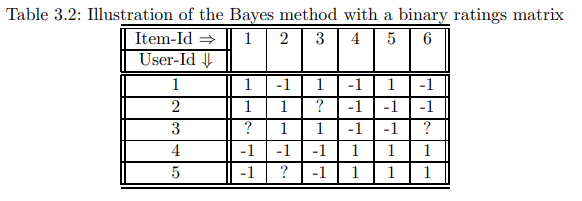

먼저 평균-중심화를 한뒤 rank-2 SVD를 시행 합니다. 

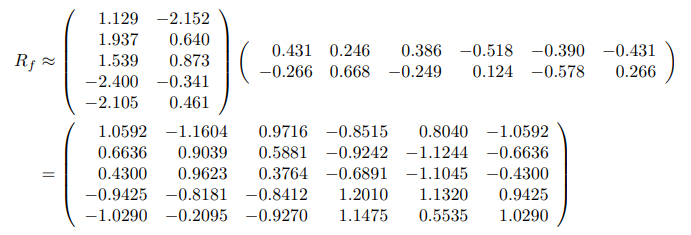

다시 위의 표에서 결측값을 SVD로 계산된 값으로 채움니다.

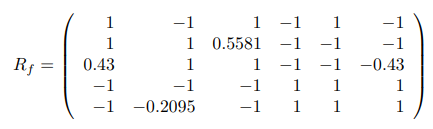

위 과정을 2번더 반복합니다.

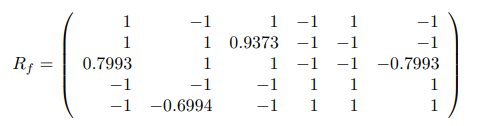

일반적으로 5~10회 반복이면 됩니다.

### Non-negative Matrix Factorization

모든 등급 값이 양수 있때 사용됩니다. 이 접근법은 user-item의 상호작용을 이해하는데 높은 수준의 해석가능성을 제공합니다. 게다가 정확성도 좋다고 합니ㅏㄷ. 위의 방식과 차이점은 제약조건으로 모든 U, V의 원소들이 양수 여야 합니다. 목적함수는 다음과 같이 제약조건에서 유클리드 거리가 가장 가까워지는 행렬들을 찾는것입니다.

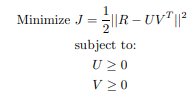

훈련은 다음과 같이 진행됩니다.

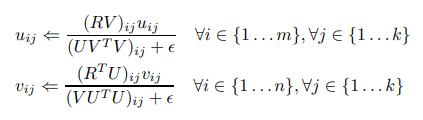

이 방식은 특히 transaction data, 구매, 클릭과 같은 implicit feedback data에 효과적입니다. 또한 양수 제약조건 라그랑지 방법을 사용한 최적화 문제로도 볼 수 있습니다. 뭔가 갑자기 생소한 식이 나왔지만 자세한건 책의 범위를 넘어간다고 설명 안하고 간단한 NMF 수행 방법에 대하여 소개 합니다. 따라서 원소가 0 이상을 유지하기 위하여 학습률이 행렬로 표시된 부분으로 구성된 업데이트 규칙으로 이루어진 방식으로 해석하고 넘어가 보겠습니다.

####  Interpretability Advantages

앞서 말했듯이 모든 음수 제약조건은 주어진 등급 설계를 자연스럽게 반영함에 따라 높은 해석력을 가지고 있습니다. 다음 그림과 같이 NMF가 되었다고 했을떄 

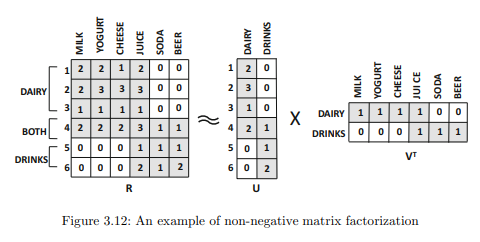

U 는 사용자의 선호도와 강도를 함께 반영하고 V는 아이템 간의 관계를 반영합니다. 예시로는 직관적인 해석이 가능하지만 실제 사례에서의 해석은 예시가 없어서 크게 와 닿지는 않습니다...

#### Observations about Factorization with Implicit Feedback

NMF는 등급이 긍정적인 선호도를 나타내는 implicit feedback matrix에 특히 적합합니다. 

#### Computational and Weighting Issues with Implicit Feedback

#### Ratings with Both Likes and Dislikes

NMF를 논의할때 implicit feedback에만 초점을 맞춰 설명했습니다. 이는 단항등급과 같이 안좋아하는 평가에대한 명확한 매커니즘이 없습니다. 하지만 1~5등급을 가진 경우 like와 dislike가 명시적으로 존재합니다. 이러한 경우 NMF를 사용했을떄 해석가능한 이점이 없습니다. 또 0으로 처리할 수 도 없습니다. 그래서 $S = \{(i, j) : r_{ij} \  is \  observed\}$와 같이 관측된 항목에 대하여 연산을 진행 합니다. 훈련은 $S$집합에서 진행됩니다.

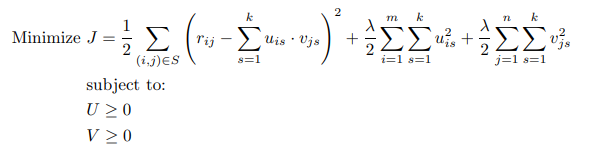

이는 제약조건이 없는 MF와 비슷합니다. 다른점은 음이 아닌 제약조건 뿐입니다. 이러한 경우 제약없는 MF에 사용되는 업데이트 식을 수정해야 합니다. 
1. U와 V를 음이 아닌 (0, 1)에서 초기화 한다.
2. 기존 업데이트 진행
3. 음수가 나올경우 0으로 수정
4. 수렴할때 까지 진행

좋아요와 싫어요를 모두 관측할수 있는 등급 체계에서 NMF의 해석 가능성 측면에서 얻는 이점은 없습니다. 또한 음이 아닌 제약 조건이 추가 되었기 때문에 관측된 항목에 대해 계산할 때 기존 방식보다 품질이 저하 될 수 있습니다.(항상은 아님) 실제 설정에서는 사용자와 항목간의 긍적적인 관계가 부정적인 관계보다 더 중요합니다. 결과적으로 음이 아닌 제약조건은 종종 overfitting을 방지하는데 도움이 됩니다. 

###  Understanding the Matrix Factorization Family

소개된 다양한 MF가 공통점을 많이 공유한다는 것은 분명합니다. 앞서 언급 한 모든 최적화 공식은 U, V에 대한 다양한 제약조건에 따라 residual matrix를 최소화 합니다. 즉, $UV^T$가 $R$에 최대한 근접하게 만드는 것 입니다. 이는 다음과 같이 일반화 될 수 있습니다. 

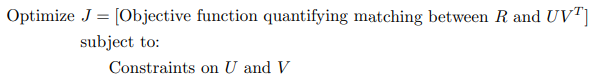

Factor matrix U, V에 대한 다른 제약 조건은 서로다른 해석 상의 이점이 있습니다. 위에서 소개된 예시로는 직교성(기하학적 해석 가능성)과 비 음수성(부분합 해석 가능성)을 제공합니다. 이러한 이점은 오류가 증가 하더라도 개선의 여지를 찾을 수 있습니다. 이는 제약조건이 대상 항목에 대한 분산을 줄이면서 편향을 증가시키기 때문입니다. 결과적으로 모델의 일반화 가능성이 더 높습니다. 사용할 올바른 제약 조건을 선택하는 것은 도메인데 따라 다르며 이에대한 통찰력이 필요합니다.

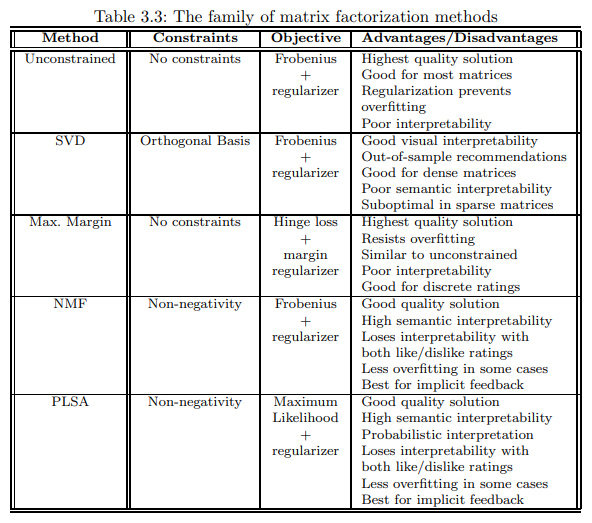

## Integrating Factorization and Neighborhood Models

평균 중심화된 R의 가정으로 모델의 다양한 부분을 다시봅니다.

### Baseline Estimator: A Non-Personalized Bias-Centric Model

A Non-Personalized Bias-Centric Model은 user, item의 편향의 추가로 R의 등급을 예측합니다. 즉, 등급은 item에 대한 user의 구체적이고 개인화 된 관심이 아닌 user의 관대함과 item의 인기로 설명됩니다. $b_i^{user}$를 사용자 i에 대한 편향, $b_j^{item}$을 item j에 대한 편향으로 설정합니다. 그럼 모델의 예측은 $\hat{r_{ij}} = b_i^{user} + b_j^{item}$ 입니다. 여기서 $S = \{(i, j) : r_{ij} \  is \  observed\}$이면 $b_i^{user}$와 $b_j^{item}$는 다음 목적 함수로 최적화 됩니다. 

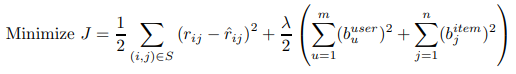

이는 사용자에게 인기를 기준으로 추천해준다고 생각됩니다.

### Neighborhood Portion of Model

### Latent Factor Portion of Model

Latent Factor Modle에서 implicit feedback은 예측을 위해 rating 정보와 통합됩니다.

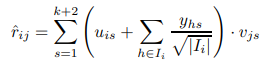

여기서 k+1, k+2는 편향 정보입니다. 

###  Integrating the Neighborhood and Latent Factor Portions

###  Solving the Optimization Model

### Observations about Accuracy

### Integrating Latent Factor Models with Arbitrary Models

##  Summary

CF를 위한 여러 모델이 설명되었습니다. CF의 문제는 분류 문제의 일반화로 볼 수 있습니다. 따라서 분류에 적용되는 많은 모델은 일부 일반화를 사용하여 CF에도 적용됩니다. 주목할 만한 예외는 MF입니다. Latent Factor model은 rating을 예측하기 위해 다양한 유형의 분해를 사용합니다. 이러한 다양한 분해 유형은 목적 함수의 특성와 기본 행렬에 대한 제약 조건이 다릅니다. 또한 정확성, overfitting, 해석 가능성 측명네서 서로 다른 절충안이 있습니다. latent factor model은 CF에서 매우 좋은 성능을 발휘 합니다. 

##  Exercises

저의 풀이를 적도록 노력해보았습니다. 틀린부분이 있다면 저에게 Explicit feedback을 주신하면 감사하겠습니다! 구현문제는 일단 넘어가겠습니다.

1. Implement a decision tree-based predictor of ratings for an incomplete data sets. Use the dimensionality reduction approach described in the chapter

> 매우 비효율적이라고 해놓고 문제로 줬습니다😂 2장의 연습문제 1에서 나온 행렬으로 트리 하나만 만들어 보겠습니다.
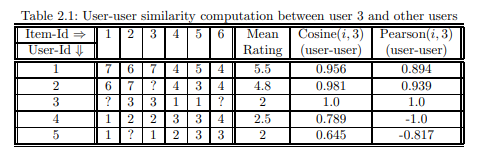
2장에서 예제에서 평균중심화를 하지않은경우4, 평균중심화를 했을때는 3점이 였습니다. 
tree기반으로는 3.5점이나왔습니다...

2. How would you use a rule-based collaborative filtering system in the case where ratings are real-numbers in \[−1, 1\].

> 규칙 기반은 거래데이터와 같은 implicit에서 유용하다고 했습니다. 하지만 데이터가 \[−1, 1\] 이고 규칙기반을 꼭써야 한다면 간단히 구간을 정하여 등급을 나누면 좋을것 같습니다. 

3. Design an algorithm that combines association rule methods with clustering for recommendations in order to discover localized associations in unary data. What is the advantage of this approach over a vanilla rule-based method?

> 본문에서 "Localized associations generally provide more refined recommendations than is possible with global rule-based methods."라고 하는데 관련 자세한 설명은 없고 관련논문만 던져 주네요...ㅂㄷㅂㄷ 나중에 한번 읽어보겠습니다.  
[C. Aggarwal, C. Procopiuc, and P. S. Yu. Finding localized associations in market basket data. IEEE Transactions on Knowledge and Data Engineering]

4. The naive Bayes model discussed in this chapter predicts the ratings of each item using the user’s other ratings as a conditional. Design a Bayes model that uses the item’s other ratings as a condition. Discuss the advantages and disadvantages of each model. Identify a case in which each approach would work better. How would you combine the predictions of the two models?

> 사용자 기반과 마찬가지로 모델을 설계하면 됩니다! 간단

5. Suppose that a merchant had a unary matrix containing the buying behavior of various customers. Each entry in the matrix contains information about whether or not a customer has bought a particular item. Among the users that have not bought an item yet, the merchant wishes to rank all the users in order of their propensity to buy it. Show how to use the Bayes model to achieve this goal.

> 구매성향에 따른 사용자의 순위라는게 뭘까요...?

6. Use the Bayes model on Table 3.1 to determine the probability that John might buy Bread in the future. Treat 0s in the table as values that are actually specified for the ratings, rather than as missing values (except for John’s ratings for Bread and Beef). Determine the probability that he might buy Beef in the future. Is John more likely to buy Bread or Beef in the future?

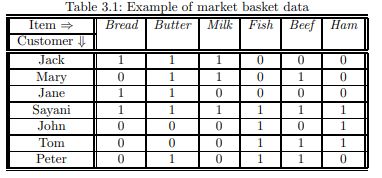

> 계산해보니 빵을 살 확률이 $\frac{1}{3}$입니다. 소고기를 살 확률도 계산해보니 빵보다 높습니다. 

7. Implement the naive Bayes model for collaborative filtering.

> 

8. Perform a straightforward rank-2 SVD of the matrix in Table 3.2 by treating missing values as 0. Based on the use of SVD, what are the predicted ratings for the missing values of user 3? How does this compare with the results shown in the example of section 3.6.5.4, which uses a different initialization? How do the results compare to those obtained using the Bayes model described in the chapter?

> 3가지 방법다 1으로 나옵니다.

9. Suppose you are given a matrix $R$ which can be factorized as $R = UV^T$ , where the columns of $U$ are mutually orthogonal and the columns of $V$ are mutually orthogonal. Show how to factorize $R$ into three matrices in the form $QΣP^T$ , where the columns of $P$ and $Q$ are orthonormal and $Σ$ is a non-negative diagonal matrix.

> 이거는 SVD를 설명하라는 말이네요 3.6.5장에 잘 설명되어 있습니다.

10. Implement the unconstrained matrix factorization method with stochastic gradient descent and batch updates.

>

11. Discuss the changes required to the alternating least-squares method for unconstrained matrix factorization, when one constrains the last column of the user-factor matrix to contain only 1s, and the second-last column of the item-factor matrix to contain only 1s. This method is useful for incorporating user and item biases in unconstrained matrix factorization.

> 본문에 ALS에 대한 설명은 안해주고 문제로 내다니 전반적으로 3장 문제들이 불친절 합니다! 마지막 열을 추가하는것은 훈련과정에서 bias를 효율적으로 추가하는 방법이고 ALS는 SGD와 다르게 factor matrix를 번갈아가면서 update하는 방식입니다. 

12. Discuss how you might apply the alternating least-squares method for designing latent factor models with implicit feedback.

> 이는 SVD++에서 제안된 방법을 참고하면 좋을것 같습니다. 거기다가 학습방법만 ALS로 바꾸면 될거라고 생각해봅니다.

13. Let the m×k matrix F, n×k matrix V , and and n×k matrix Y be defined as discussed in the asymmetric factor model portion of section 3.6.4.6. Assume a simplified setting of asymmetric factor models in which we do not need to account for user and item biases.
  + Show that the stochastic gradient-descent updates for each observed entry (i, j) in the ratings matrix R are as follows: Here, eij = rij − rˆij is the error of observed entry (i, j) and Ii is the set of items for which user i has specified ratings.
   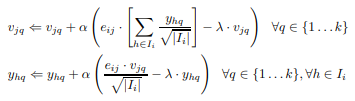
  + What changes would need to be made to the definitions of various matrices and to the updates to account for user and item biases?